In [1]:
import os
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation

from meld_graph.dataset import GraphDataset
from meld_classifier.meld_cohort import MeldCohort, MeldSubject

from meld_graph.evaluation import Evaluator
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import umap




Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350


In [2]:
save_dir = '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-09-29_TEST_save_fingerprints'


   Unnamed: 0      ymin  ymax  k     m  \
0           0  0.128679   0.5  1  0.05   

                                       desc  
0  ymin0.12867880165576934_ymax0.5_k1_m0.05  
['MELD2_H7_3T_FCD_001', 'MELD2_H7_3T_FCD_004', 'MELD2_H7_3T_FCD_005', 'MELD2_H7_3T_FCD_009', 'MELD_H10_3T_C_0005', 'MELD_H10_3T_C_0006', 'MELD_H10_3T_C_0009', 'MELD_H10_3T_C_0011', 'MELD_H10_3T_C_0012', 'MELD_H10_3T_C_0013', 'MELD_H10_3T_C_0014', 'MELD_H10_3T_C_0015', 'MELD_H10_3T_C_0017', 'MELD_H10_3T_C_0018', 'MELD_H10_3T_C_0019', 'MELD_H10_3T_C_0021', 'MELD_H10_3T_C_0022', 'MELD_H10_3T_C_0025', 'MELD_H10_3T_C_0028', 'MELD_H10_3T_C_0029', 'MELD_H10_3T_C_0031', 'MELD_H10_3T_FCD_0002', 'MELD_H10_3T_FCD_0009', 'MELD_H10_3T_FCD_0013', 'MELD_H10_3T_FCD_0014', 'MELD_H10_3T_FCD_0016', 'MELD_H11_3T_FCD_0002', 'MELD_H11_3T_FCD_0006', 'MELD_H11_3T_FCD_0007', 'MELD_H11_3T_FCD_0009', 'MELD_H11_3T_FCD_0010', 'MELD_H11_3T_FCD_0011', 'MELD_H11_3T_FCD_0015', 'MELD_H11_3T_FCD_0019', 'MELD_H11_3T_FCD_0020', 'MELD_H11_3T_FCD_002

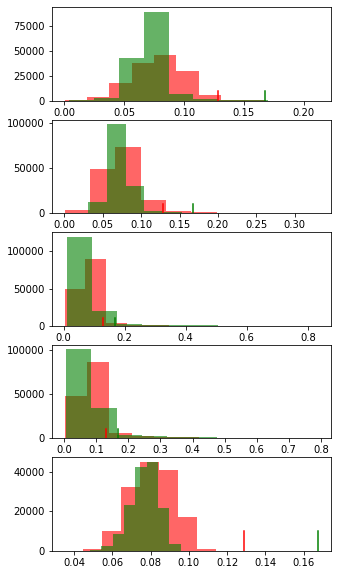

In [65]:
# import h5py
# import os

# paths = ['/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_THSG_cop/s_0/fold_all/results_best_model',
#         '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all/results_best_model',
#         ]

# colors=['red', 'green']
# fig, axs = plt.subplots(5,1, figsize=(5,10))
# for p, path in enumerate(paths):
#     sig_file = os.path.join(path,'sigmoid_optimal_parameters.csv')
#     df = pd.read_csv(sig_file)
#     y_min = df['ymin'].values[0]
#     print(df) 
#     pred_file = os.path.join(path, 'predictions.hdf5')
#     with h5py.File(pred_file, "r") as f:
#         print(list(f.keys()))
#         for i, subject in enumerate(list(f.keys())[0:5]):
#             axs[i].hist(f[subject]['lh']['prediction'][:], alpha=0.6, color=colors[p])
#             axs[i].plot([y_min, y_min], [0, 10000], c=colors[p])
#             print(f[subject]['lh']['prediction_clustered'][:].sum())
#             print((f[subject]['lh']['prediction'][:]>y_min).sum())
#             # print(f['MELD_H3_3T_C_0032']['lh']['prediction'][:])
        

In [3]:
# load experiment
model_path = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-30_IGKW_object_save_final/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_path)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "test"
save_prediction_suffix=""

subjects = exp.data_parameters["test_ids"]


features = exp.data_parameters["features"]
cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )
dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
    
# create evaluator
eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_path,
    make_images=False,
    dataset=dataset,
    # save_dir=save_dir,
    cohort=cohort,
    subject_ids=subjects,
    mode="test",
    thresh_and_clust=False,
    model_name='best_model'
)


Initialised Experiment 23-08-30_IGKW_object_save_final/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-30_IGKW_object_save_final/s_0/fold_all


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0001
Z-scoring data for MELD_H2_15T_FCD_0003
Z-scoring data for MELD_H2_15T_FCD_0005
Z-scoring data for MELD_H2_15T_FCD_0007
Z-scoring data for MELD_H2_15T_FCD_0008
Z-scoring data for MELD_H2_15T_FCD_0009
Z-scoring data for MELD_H2_15T_FCD_0014
Z-scoring data for MELD_H2_15T_FCD_0015
Z-scoring data for MELD_H2_15T_FCD_0016
Z-scoring data for MELD_H2_15T_FCD_0020
Z-scoring data for MELD_H2_15T_FCD_0023
Z-scoring data for MELD_H2_15T_FCD_0028
Z-scoring data for MELD_H2_15T_FCD_0029
Z-scoring data for MELD_H2_15T_FCD_0030
Z-scoring data for MELD_H2_3T_FCD_0003
Z-scoring data for MELD_H2_3T_FCD_0004
Z-scoring data for MELD_H2_3T_FCD_0005
Z-scoring data for MELD_H2_3T_FCD_0006
Z-scoring data for MELD_H2_3T_FCD_0008
Z-scoring data for MELD_H2_3T_FCD_0014
Z-scoring data for MELD_H2_3T_FCD_0016
Z-scoring data for MELD_H2_3T_FCD_0017
Z-scoring data for MELD_H2_3T_FCD_0018
Z-scoring data for MELD_H2_15T_C_0001
Z-scoring data 

In [3]:
print(len(subjects))

453


### Save fingerprints for most salient vertices

In [4]:
values = {}

df=pd.DataFrame()

for subj_id in subjects:
    data_dict = eva.load_data_from_file(subj_id, keys=['cluster_thresholded','input_labels', 'input_features'], split_hemis=False, save_prediction_suffix="")
    # get cluster
    for cl in np.unique(data_dict['cluster_thresholded']):
        if cl == 0:  # dont do background cluster
            continue
        values['subject_id']=subj_id
        values['cluster_id']=cl
        #cluster detected or not
        labels = data_dict['input_labels'].astype(bool)
        cl_mask = (data_dict['cluster_thresholded']==cl)
        if (labels*cl_mask==True).any():
            values['detected']=True
        else:
            values['detected']=False
        data_mask = eva.load_data_from_file(subj_id, keys=[f'mask_salient_{cl}'], split_hemis=False, save_prediction_suffix="")
        mask_salient = data_mask[f'mask_salient_{cl}'].astype(bool)
        print(mask_salient.sum())
        # extract mean and std feature on mask salient
        data_features = data_dict[f'input_features']
        mean_features = data_features[mask_salient].mean(axis=0)
        std_features = data_features[mask_salient].std(axis=0)
        # save in dataframe
        for f, feature in enumerate(features):
            if mean_features[f].sum()!=0:
                values[f'mean_salient_{feature}'] = mean_features[f]
                values[f'std_salient_{feature}'] = std_features[f]
            else:
                values[f'mean_salient_{feature}'] = np.nan
                values[f'std_salient_{feature}'] = np.nan
        df = pd.concat([df, pd.DataFrame([values])])
            
# file = os.path.join(save_dir, 'results_best_model', 'fingerprints.csv')
# df.to_csv(file)           

Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0001
Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0003


154


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0005
Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0007


1145


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0008


1022
483


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0009


1073


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0014
Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0015


1156


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0016


982


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0020


540


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0023
Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0028


826


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0029
Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0030


805
663


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0003
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0004


1244


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0005


761


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0006


367


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0008
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0014


1844


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0016


125


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0017
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_FCD_0018


351


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_C_0001


258


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0001


847


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0003
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0007
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0008
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0009
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0013
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0014
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0017
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0019


532


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0020
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0021
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0025


2708
996


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0027
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0029
Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0030


125


Loading and preprocessing test data
Z-scoring data for MELD_H2_3T_C_0031
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0002


172


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0003


278


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0004


234


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0005


158


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0007
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0008


524


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0009


478


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0010


471


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0012


762


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0014


737


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0015


514


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0016


320


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0018
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0020
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0022


750


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_FCD_0023


608


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0003
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0004
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0010
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0011
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0013
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0016
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0017
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0021
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0023
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0028
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0034
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0035
Loading and preprocessing test data
Z-scoring data 

602


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0048
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0051
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0058
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0061
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0066
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0067
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0068


712


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0070
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0071
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0072
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0075
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0076


951


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0077
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0079
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0080


599


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0081
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0082


341


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0084
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0085
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0088


4322


Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0095
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0096
Loading and preprocessing test data
Z-scoring data for MELD_H3_3T_C_0099
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0002


1086


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0003


711


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0009


390


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0016


313


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0017


5801


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0018


125


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0019
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0020


256


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_FCD_0021
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0002


358


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0005


531


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0007


125


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0009


1159


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0010


617


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0015
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0016


397


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0031


430


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0038


757


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_FCD_0040
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0001
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0002


6051
125


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0007


266
526


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0011
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0012


813


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0014
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0018
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0020
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0022
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0024
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0025


332


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0026
Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0029


125


Loading and preprocessing test data
Z-scoring data for MELD_H4_15T_C_0030
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0001
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0007
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0009
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0010
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0013
Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0015


264


Loading and preprocessing test data
Z-scoring data for MELD_H4_3T_C_0016
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0001


1327


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0004


1048


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0005


1141


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0007


910
164


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0011
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0014


583


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0015


126


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0017


409


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0020


247


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0021
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0022


654


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0024


125


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0026


627


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_FCD_0029


381
410


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0001
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0002
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0004
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0006


225


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0007
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0009


1093
125


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0010
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0011
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0012


125


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0014


716
228


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0015
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0016
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0017
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0018


151


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0019
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0021


631


Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0025
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0027
Loading and preprocessing test data
Z-scoring data for MELD_H5_3T_C_0029


9085


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0004


259


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0005


2671


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0006


1537


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0009
Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0011


660


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0013


426


Loading and preprocessing test data
Z-scoring data for MELD_H6_3T_FCD_0017


918


Loading and preprocessing test data
Z-scoring data for MELD2_H7_3T_FCD_001


232


Loading and preprocessing test data
Z-scoring data for MELD2_H7_3T_FCD_004


288


Loading and preprocessing test data
Z-scoring data for MELD2_H7_3T_FCD_005


691


Loading and preprocessing test data
Z-scoring data for MELD2_H7_3T_FCD_009


477


Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_FCD_0003
Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_FCD_0004


830


Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_FCD_0005


540


Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_FCD_0010


395


Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_C_0002
Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_C_0005
Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_C_0007
Loading and preprocessing test data
Z-scoring data for MELD_H9_3T_C_0009


125


Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0002


424


Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0009


2676


Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0013
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0014
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0016


1712


Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0005
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0006
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0009
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0011
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0013
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0014
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0015
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0017
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0018
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0019
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0021
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0022
Loading and preprocessing test data
Z-

1509


Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_C_0031
Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0002
Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0006


125


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0007


543


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0009


575


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0010


788


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0011


1254


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0015
Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0019


393


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0020


589


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0025


183


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0027


656


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0028
Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0030


554


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0031


125


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0040


298


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0041


391


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0042


149


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0044


294


Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0045


538


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0003


2927


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0006
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0007
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0009


520


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0011


1571


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0014


125


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0016


1869


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0018


127


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_FCD_0030


197


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0002


1207


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0004
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0005


311
500


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0007
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0010
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0011
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0014
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0016
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0018
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0023
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0024


1339


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0025
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0026
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0028
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0029
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0031
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0032
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0034
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0035
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0036
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0037
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0038


1946


Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0040
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0041
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0042
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0044
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0045
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0050
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0051
Loading and preprocessing test data
Z-scoring data for MELD_H12_3T_C_0052
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0009


313


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0011


1088


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0013


1581


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0016
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0017


1247


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0021


1287


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0022
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0023


1221


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0024


216


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0025


894


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0026


3017


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0029
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0030


220


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0031


360


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0034
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0035


142


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0037


3047


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0039


519


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0040


536


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0042


1154


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0001
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0002
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0003
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0005


477


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0010


145


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0014


387


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0015
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0016


1108


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0017
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0019


1382


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0020


150


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0021
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0024
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_C_0025
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_FCD_0003


377


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_FCD_0004


5477


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_FCD_0007


872


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_FCD_0008


388


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_FCD_0010


378


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0001
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0006
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0007


384
125


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0012
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0013
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0015
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0018
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0019
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0025
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0027
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0030
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0031
Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0032


4824


Loading and preprocessing test data
Z-scoring data for MELD_H15_3T_C_0033
Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_001
Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_003
Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_004


373


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_005


139


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_008


1474


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_010


646


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_013


217


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_015


452


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_016


987


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_017


891


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_022


552


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_023


612


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_026


772


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_045


1068


Loading and preprocessing test data
Z-scoring data for MELD_H16_3T_FCD_048


453


Loading and preprocessing test data
Z-scoring data for MELD_H17_15T_FCD_0011


553


Loading and preprocessing test data
Z-scoring data for MELD_H17_15T_FCD_0017


547
430


Loading and preprocessing test data
Z-scoring data for MELD_H17_15T_FCD_0102


729


Loading and preprocessing test data
Z-scoring data for MELD_H17_15T_FCD_0104
Loading and preprocessing test data
Z-scoring data for MELD_H17_15T_FCD_0139
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0001


148


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0014


125


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0018
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0022


834


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0039


125


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0043


729


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0044
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0053


643


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0054


608


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0057


1522


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0061


542


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0067


267


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0070


322


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0076


2092


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0079


3973
856
303


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0084


125


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0086


197


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0090


460
337


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0091


1938


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0094
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0098


2649


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0112
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0116


1556


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0120


604


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0127


1222


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0135


454


Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0143


542


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0001


387


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0006


463


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0008


125


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0009


363
837


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0101


468


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0109


736


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0115


516


Loading and preprocessing test data
Z-scoring data for MELD_H18_3T_FCD_0124
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_008
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_014


511


Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_017


403


Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_018
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_020


310


Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_024
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_025
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_026


1648


Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_029
Loading and preprocessing test data
Z-scoring data for MELD_H19_3T_C_031
Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0036
Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0038


1141


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0040
Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0043


2145


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0047


2437


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0049


297
571


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0050


824


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0051


540


Loading and preprocessing test data
Z-scoring data for MELD_H21_15T_FCD_0052


316


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0007


544


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0008


896


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0009
Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0013


1175


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0016


455


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0017


670
140


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0018


234


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0030


982


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0033


188
125


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0034


1200


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0035


546


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0046


594


Loading and preprocessing test data
Z-scoring data for MELD_H21_3T_FCD_0048


928


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0003


896


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0004
Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0005


125


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0011


125


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0013


738


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0015
Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0020
Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0021


489


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0022


1765


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0023


737


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0025


394


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0027


125


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0030


4288


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0031


711


Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0032


348


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0003


344


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0005


493


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0006


217
1260


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0007


764


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0011
Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0012
Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0013


1756


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0015


247
404
194


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0025
Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0026


808
1646


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0029


125


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0030


1186


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0036


5933


Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0037
Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0040
Loading and preprocessing test data
Z-scoring data for MELD_H24_3T_FCD_0041


686


Loading and preprocessing test data
Z-scoring data for MELD_H26_15T_FCD_0001
Loading and preprocessing test data
Z-scoring data for MELD_H26_15T_FCD_0005


141


Loading and preprocessing test data
Z-scoring data for MELD_H26_15T_FCD_0009


304


Loading and preprocessing test data
Z-scoring data for MELD_H26_15T_FCD_0010
Loading and preprocessing test data
Z-scoring data for MELD_H26_3T_FCD_0002


1244


Loading and preprocessing test data
Z-scoring data for MELD_H26_3T_FCD_0004


188


Loading and preprocessing test data
Z-scoring data for MELD_H26_3T_FCD_0007


910


In [10]:
df.groupby(['detected'])['subject_id'].count()

detected
False    116
True     157
Name: subject_id, dtype: int64

In [11]:
file = os.path.join(eva.save_dir, 'results_best_model', 'fingerprints.csv')
df.to_csv(file) 

### organise data

In [4]:
# load experiment
model_path = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-30_IGKW_object_save_final/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_path)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "test"
save_prediction_suffix=""

subjects = exp.data_parameters["test_ids"]

features = exp.data_parameters["features"]
cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )

Initialised Experiment 23-08-30_IGKW_object_save_final/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-30_IGKW_object_save_final/s_0/fold_all


In [5]:
file = os.path.join(model_path, 'results_best_model', 'fingerprints.csv')
df= pd.read_csv(file)
df.head()

,Unnamed: 0,subject_id,cluster_id,detected,mean_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,std_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,mean_salient_.combat.on_lh.thickness.sm3.mgh,std_salient_.combat.on_lh.thickness.sm3.mgh,mean_salient_.combat.on_lh.thickness_regression.sm3.mgh,std_salient_.combat.on_lh.thickness_regression.sm3.mgh,...,mean_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh
0,0,MELD_H2_15T_FCD_0003,1.0,False,1.049822,0.473172,-0.466756,0.899892,-0.262274,0.921346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,MELD_H2_15T_FCD_0007,1.0,True,5.215485,2.978238,1.792603,0.926543,2.209819,1.043152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,MELD_H2_15T_FCD_0008,1.0,False,2.385575,0.923238,1.233127,1.106050,1.404153,1.224830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,MELD_H2_15T_FCD_0008,2.0,False,2.784975,0.345130,1.018662,1.161334,1.168264,1.333046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,MELD_H2_15T_FCD_0009,1.0,True,3.156223,0.995717,2.493570,0.845334,2.695253,0.845840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# add demographic info
age_array=[]
sex_array=[]
histo_array=[]
site_array=[]
flair_array=[]
group_array=[]
sf_array=[]
for r, row in df.iterrows():
    subj = MeldSubject(row['subject_id'], cohort)
    if '_FCD_' in row['subject_id']:
        group_array.append('patient')
    else:
        group_array.append('control')
    age, sex, histo, site, sf = subj.get_demographic_features(["Age at preoperative", "Sex", "Histology", "Site", "Seizure free"])
    age_array.append(age)
    sex_array.append(sex)
    histo_array.append(histo)
    site_array.append(site)
    sf_array.append(sf)
    # add FLAIR
    if row['mean_salient_.combat.on_lh.gm_FLAIR_0.sm3.mgh']==0:
        flair_array.append(False)
    else:
        flair_array.append(True)

    
df['age']=age_array
df['sex']=sex_array
df['histo']=histo_array
df['site']=site_array
df['FLAIR']=flair_array
df['seizure_freedom']=sf_array

df.head()

,Unnamed: 0,subject_id,cluster_id,detected,mean_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,std_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,mean_salient_.combat.on_lh.thickness.sm3.mgh,std_salient_.combat.on_lh.thickness.sm3.mgh,mean_salient_.combat.on_lh.thickness_regression.sm3.mgh,std_salient_.combat.on_lh.thickness_regression.sm3.mgh,...,mean_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh,age,sex,histo,site,FLAIR,seizure_freedom
0,0,MELD_H2_15T_FCD_0003,1.0,False,1.049822,0.473172,-0.466756,0.899892,-0.262274,0.921346,...,NaN,NaN,NaN,NaN,10.0,0.0,NaN,H2,True,NaN
1,0,MELD_H2_15T_FCD_0007,1.0,True,5.215485,2.978238,1.792603,0.926543,2.209819,1.043152,...,NaN,NaN,NaN,NaN,4.0,1.0,FCD_2B,H2,True,1.0
2,0,MELD_H2_15T_FCD_0008,1.0,False,2.385575,0.923238,1.233127,1.106050,1.404153,1.224830,...,NaN,NaN,NaN,NaN,10.0,1.0,NaN,H2,True,NaN
3,0,MELD_H2_15T_FCD_0008,2.0,False,2.784975,0.345130,1.018662,1.161334,1.168264,1.333046,...,NaN,NaN,NaN,NaN,10.0,1.0,NaN,H2,True,NaN
4,0,MELD_H2_15T_FCD_0009,1.0,True,3.156223,0.995717,2.493570,0.845334,2.695253,0.845840,...,NaN,NaN,NaN,NaN,18.0,1.0,NaN,H2,True,NaN


In [38]:
file_conf = os.path.join(model_path, 'results_best_model', 'confidence.csv')
df_conf= pd.read_csv(file_conf)
df_conf.head()

,Unnamed: 0,subject_id,cluster_id,confidence,TP,confidence_mask_salient,TP_mask_salient
0,0,MELD_H2_15T_FCD_0003,1,0.361084,0,0.395486,0
1,1,MELD_H2_15T_FCD_0007,1,0.826766,1,0.851094,1
2,2,MELD_H2_15T_FCD_0008,1,0.207184,0,0.215002,0
3,3,MELD_H2_15T_FCD_0008,2,0.190086,0,0.192112,0
4,4,MELD_H2_15T_FCD_0009,1,0.771383,1,0.869317,1


In [49]:
## add confidence

file_conf = os.path.join(model_path, 'results_best_model', 'confidence.csv')
df_conf= pd.read_csv(file_conf)

confidence_array=[]
for r, row in df.iterrows():
    subject_id = row['subject_id']
    cluster_id = row['cluster_id']
    confidence = df_conf[(df_conf['subject_id']==subject_id)&(df_conf['cluster_id']==cluster_id)]['confidence_mask_salient'].values[0]
    confidence_array.append(confidence)
    
df['confidence']=confidence_array

df.head()

,Unnamed: 0,subject_id,cluster_id,detected,mean_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,std_salient_.combat.on_lh.pial.K_filtered.sm20.mgh,mean_salient_.combat.on_lh.thickness.sm3.mgh,std_salient_.combat.on_lh.thickness.sm3.mgh,mean_salient_.combat.on_lh.thickness_regression.sm3.mgh,std_salient_.combat.on_lh.thickness_regression.sm3.mgh,...,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,mean_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh,std_salient_.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh,age,sex,histo,site,FLAIR,seizure_freedom,confidence
0,0,MELD_H2_15T_FCD_0003,1.0,False,1.049822,0.473172,-0.466756,0.899892,-0.262274,0.921346,...,NaN,NaN,NaN,10.0,0.0,NaN,H2,True,NaN,0.395486
1,0,MELD_H2_15T_FCD_0007,1.0,True,5.215485,2.978238,1.792603,0.926543,2.209819,1.043152,...,NaN,NaN,NaN,4.0,1.0,FCD_2B,H2,True,1.0,0.851094
2,0,MELD_H2_15T_FCD_0008,1.0,False,2.385575,0.923238,1.233127,1.106050,1.404153,1.224830,...,NaN,NaN,NaN,10.0,1.0,NaN,H2,True,NaN,0.215002
3,0,MELD_H2_15T_FCD_0008,2.0,False,2.784975,0.345130,1.018662,1.161334,1.168264,1.333046,...,NaN,NaN,NaN,10.0,1.0,NaN,H2,True,NaN,0.192112
4,0,MELD_H2_15T_FCD_0009,1.0,True,3.156223,0.995717,2.493570,0.845334,2.695253,0.845840,...,NaN,NaN,NaN,18.0,1.0,NaN,H2,True,NaN,0.869317


In [25]:
def mscatter(x,y,ax=None,label=None, m=None, s=20 ,**kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw, s=s,label=label)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    #ax.set_xlim([-5,12.5])
    #ax.set_ylim([0,15])
    #plt.axis('off')
    return sc

def format_umap_axes(ax):
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    return

## Analysis with UMAP

In [52]:
#select submatrix for analysis
subdf=df.copy()
# subdf=subdf[subdf['FLAIR']==True].copy()
subdf = subdf.reset_index()

# select mean features
keys = [feature for feature in subdf.keys() if 'mean_salient_.inter_z.' in feature]
print(len(keys))
X = subdf[keys]
X=np.array(X)
#set missing values to 0
X=np.nan_to_num(X)

# reduce dimension with umap
my_umap=umap.UMAP(
    n_neighbors=10,
    min_dist=0.5,
    n_components=2,
    random_state=0,
)

clusterable_embedding = np.zeros((len(X[:,0]),2))
clusterable_embedding = my_umap.fit_transform(X)
clusterable_embedding[:,1] = -clusterable_embedding[:,1]
 

22


/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
len(subdf)

273

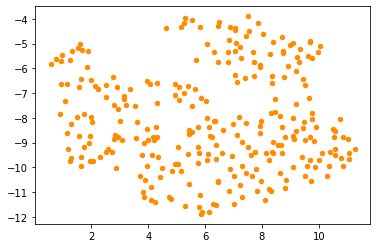

In [53]:
## plot embedding
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], color='darkorange', s=20,)

mean_salient_.inter_z.intra_z.combat.on_lh.w-g.pct.sm3.mgh
mean_salient_.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh
mean_salient_.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh


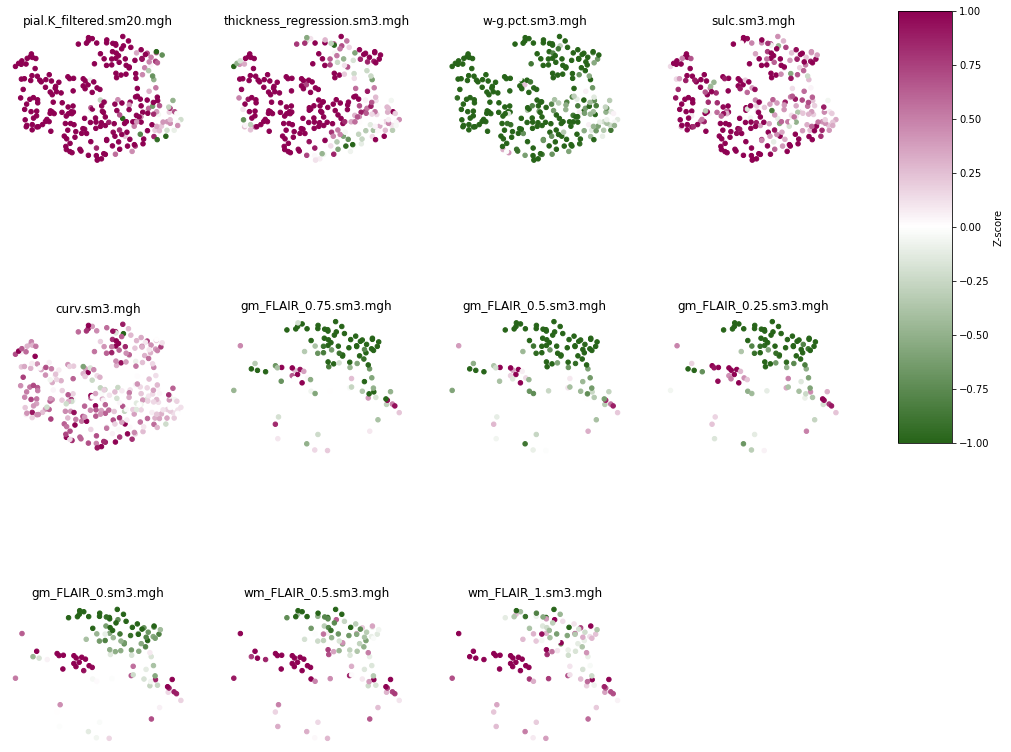

In [54]:
# color by feature
from matplotlib.gridspec import GridSpec
import matplotlib

cmap_hex = matplotlib.colors.LinearSegmentedColormap.from_list('grpr',colors=['#276419','#FFFFFF','#8E0152',])

sub_keys = ['mean_salient_'+feature for feature in features if 'inter_z.intra_z.combat' in feature ]
titles = [feature.split('.combat.on_lh.')[-1] for feature in sub_keys]
#plot features distribution
fig = plt.figure(figsize=(15,15))
gs1 = GridSpec(3,4)
axs = []

for i, key in enumerate(sub_keys): 
    overlay = X[:, np.where(np.array(keys) == key)[0][0]]
    title=titles[i]
    axs.append(fig.add_subplot(gs1[i]))
    if 'FLAIR' in title:
        mask=overlay!=0
        s= mscatter(clusterable_embedding[:, 0][mask],
                    clusterable_embedding[:, 1][mask], c=overlay[mask],
                    cmap=cmap_hex, 
                ax=axs[i], s=20, vmin=-1, vmax=1)
    else:
        s= mscatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
                    c=overlay, cmap=cmap_hex, 
                ax=axs[i], s=20, vmin=-1, vmax=1)
    
    axs[i].set_title(title)
    axs[i].set_aspect(1)
    axs[i].set_axis_off()
    if 'w' in key:
        print(key)
        #fig.colorbar(s,ax=axs[i])
        
cax = fig.add_axes([0.95, 0.45, 0.05, 0.4])
fig.colorbar(s,cax=cax,label='Z-score')



Text(0.5, 1.0, 'UMAP colored by confidence')

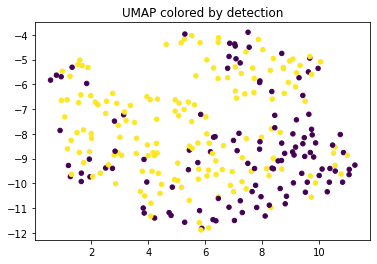

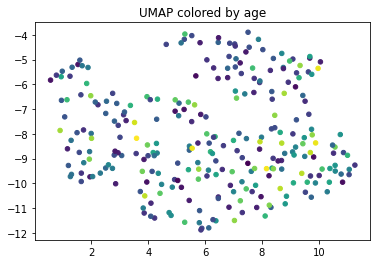

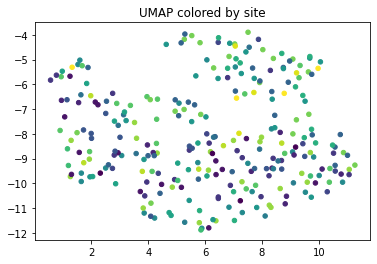

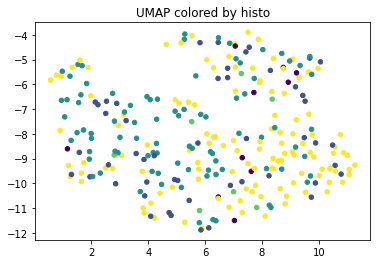

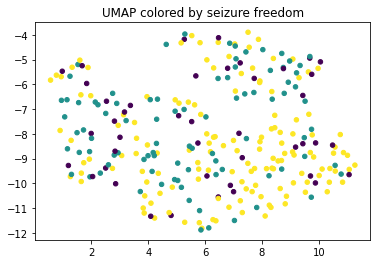

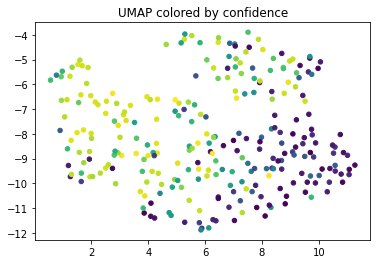

In [56]:
from sklearn import preprocessing
#plot umap with demographic

# color by detection
le = preprocessing.LabelEncoder()
le.fit(subdf['detected'])
c = le.transform(subdf['detected'])
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('UMAP colored by detection')

# color by age
c = subdf['age'].values
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c,cmap = 'viridis', s=20,)
plt.title('UMAP colored by age')

# color by site
le = preprocessing.LabelEncoder()
le.fit(subdf['site'])
c = le.transform(subdf['site'])
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('UMAP colored by site')

# color by histopathology
le = preprocessing.LabelEncoder()
le.fit(subdf['histo'])
c = le.transform(subdf['histo'])
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('UMAP colored by histo')

# color by seizure freedom
le = preprocessing.LabelEncoder()
le.fit(subdf['seizure_freedom'])
c = le.transform(subdf['seizure_freedom'])
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('UMAP colored by seizure freedom')

# color by confidence
c = subdf['confidence'].values
plt.figure()
plt.scatter(clusterable_embedding[:, 0], 
         clusterable_embedding[:, 1], c=c,cmap = 'viridis', s=20,)
plt.title('UMAP colored by confidence')


### Analysis with PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#select submatrix for analysis
subdf=df.copy()
# subdf=subdf[subdf['FLAIR']==True].copy()
subdf = subdf.reset_index()

# select mean features
keys = [feature for feature in subdf.keys() if 'mean_salient_.inter_z' in feature ]
len(keys)
X = subdf[keys]
X=np.array(X)
#set missing values to 0
X=np.nan_to_num(X)

#scale
# X = StandardScaler().fit_transform(X) # normalizing the features

pca= PCA(n_components=2)
principalComponents = pca.fit_transform(X)
 

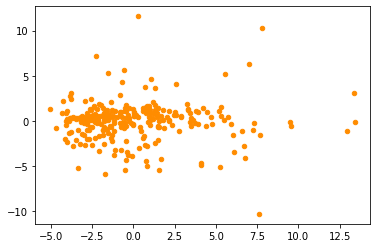

In [44]:
## plot embedding
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], color='darkorange', s=20,)

mean_salient_.inter_z.intra_z.combat.on_lh.w-g.pct.sm3.mgh
mean_salient_.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh
mean_salient_.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh


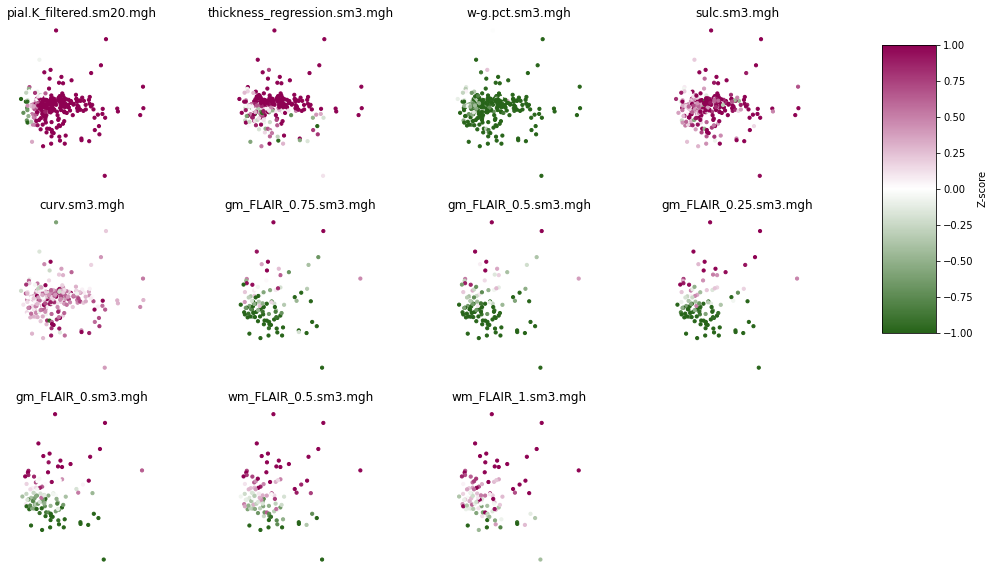

In [45]:
# color by feature
from matplotlib.gridspec import GridSpec
import matplotlib

cmap_hex = matplotlib.colors.LinearSegmentedColormap.from_list('grpr',colors=['#276419','#FFFFFF','#8E0152',])

sub_keys = ['mean_salient_'+feature for feature in features if 'inter_z.intra_z.combat' in feature ]
titles = [feature.split('.combat.on_lh.')[-1] for feature in sub_keys]
#plot features distribution
fig = plt.figure(figsize=(15,10))
gs1 = GridSpec(3,4)
axs = []

for i, key in enumerate(sub_keys): 
    overlay = X[:, np.where(np.array(keys) == key)[0][0]]
    title=titles[i]
    axs.append(fig.add_subplot(gs1[i]))
    if 'FLAIR' in title:
        mask=overlay!=0
        s= mscatter(principalComponents[:, 0][mask],
                    principalComponents[:, 1][mask], c=overlay[mask],
                    cmap=cmap_hex, 
                ax=axs[i], s=10, vmin=-1, vmax=1)
    else:
        s= mscatter(principalComponents[:, 0], principalComponents[:, 1],
                    c=overlay, cmap=cmap_hex, 
                ax=axs[i], s=10, vmin=-1, vmax=1)
    
    axs[i].set_title(title)
    axs[i].set_aspect(1)
    axs[i].set_axis_off()
    if 'w' in key:
        print(key)
        #fig.colorbar(s,ax=axs[i])
        
cax = fig.add_axes([0.95, 0.45, 0.05, 0.4])
fig.colorbar(s,cax=cax,label='Z-score')



Text(0.5, 1.0, 'PCA colored by confidence')

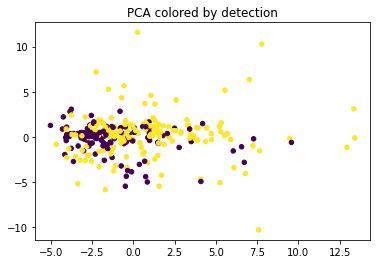

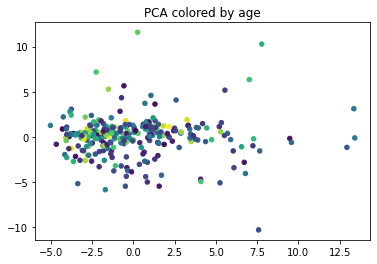

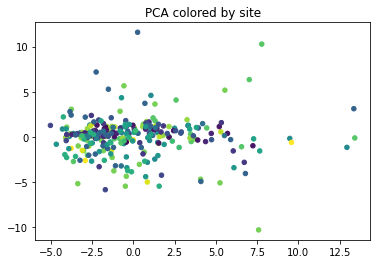

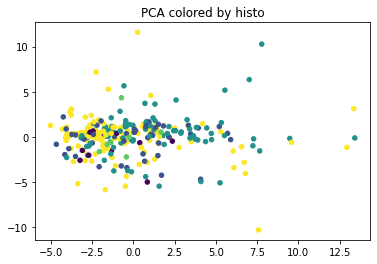

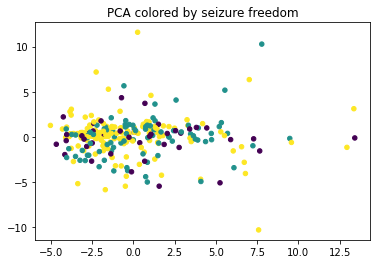

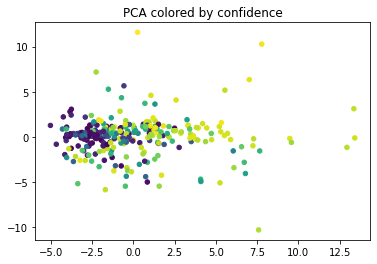

In [51]:
from sklearn import preprocessing
#plot umap with demographic

# color by detection
le = preprocessing.LabelEncoder()
le.fit(subdf['detected'])
c = le.transform(subdf['detected'])
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('PCA colored by detection')

# color by age
c = subdf['age'].values
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c,cmap = 'viridis', s=20,)
plt.title('PCA colored by age')

# color by site
le = preprocessing.LabelEncoder()
le.fit(subdf['site'])
c = le.transform(subdf['site'])
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('PCA colored by site')

# color by histopathology
le = preprocessing.LabelEncoder()
le.fit(subdf['histo'])
c = le.transform(subdf['histo'])
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('PCA colored by histo')

# color by seizure freedom
le = preprocessing.LabelEncoder()
le.fit(subdf['seizure_freedom'])
c = le.transform(subdf['seizure_freedom'])
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c, cmap = 'viridis', s=20,)
plt.title('PCA colored by seizure freedom')

# color by confidence
c = subdf['confidence'].values
plt.figure()
plt.scatter(principalComponents[:, 0], 
         principalComponents[:, 1], c=c,cmap = 'viridis', s=20,)
plt.title('PCA colored by confidence')


In [37]:
c

array([2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1])